<a href="https://colab.research.google.com/github/gmehra123/data_science_projs/blob/main/PCA_full_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [2]:
cancer=pd.read_csv('https://assets.datacamp.com/production/repositories/1796/datasets/0eb6987cb9633e4d6aa6cfd11e00993d2387caa4/wbc.csv')

In [3]:
scaler=StandardScaler()
pca=PCA()
pipeline=make_pipeline(scaler,pca)

In [4]:
cancer.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
features=cancer.drop(columns='Unnamed: 32')

In [6]:
le=LabelEncoder()
cancer['diagnosis']=le.fit_transform(cancer.diagnosis)
y=cancer['diagnosis']

In [7]:
features=cancer.drop(columns=['Unnamed: 32','diagnosis','id'])

In [8]:
pipeline.fit(features)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [9]:
pca.components_[:,0].shape

(30,)

In [10]:
pd.DataFrame(pca.components_,columns=features.columns).head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
2,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791
3,0.041409,-0.603050,0.041983,0.053434,0.159383,0.031795,0.019123,0.065336,0.067125,0.048587,...,0.015417,-0.632808,0.013803,0.025895,0.017652,-0.091328,-0.073951,0.006007,-0.036251,-0.077053
4,0.037786,-0.049469,0.037375,0.010331,-0.365089,0.011704,0.086375,-0.043861,-0.305941,-0.044424,...,-0.004407,-0.092883,0.007454,-0.027391,-0.324435,0.121804,0.188519,0.043332,-0.244559,0.094423


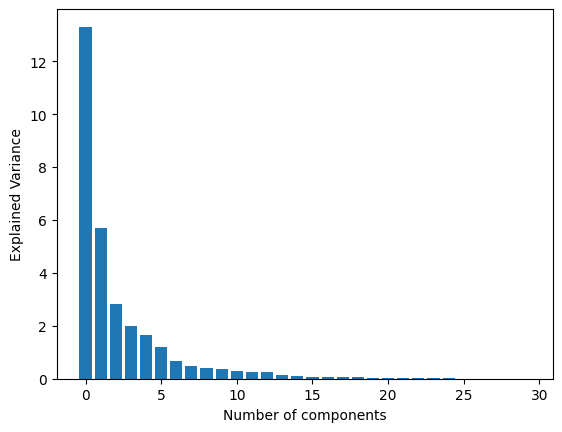

In [11]:
feat=range(pca.n_components_)
explained_variance=pca.explained_variance_
fig,ax=plt.subplots()
ax.bar(x=feat,height=explained_variance)
ax.set_xlabel('Number of components')
ax.set_ylabel('Explained Variance')
plt.show()

In [12]:
pca=PCA(n_components=5)
scaler=StandardScaler()
pipeline=make_pipeline(scaler,pca)
pipeline.fit(features)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=5))])

In [14]:
transformed=pipeline.transform(features)
transformed

array([[ 9.19283683,  1.94858307, -1.12316613,  3.63373081, -1.19510978],
       [ 2.3878018 , -3.76817174, -0.52929267,  1.11826383,  0.62177512],
       [ 5.73389628, -1.0751738 , -0.55174763,  0.91208276, -0.1770863 ],
       ...,
       [ 1.25617928, -1.90229671,  0.56273052, -2.08922701,  1.80999128],
       [10.37479406,  1.67201011, -1.87702935, -2.35603109, -0.03374209],
       [-5.4752433 , -0.67063679,  1.49044306, -2.29915708, -0.18470355]])

In [16]:
X=pd.DataFrame(transformed,columns=['PCA1','PCA2','PCA3','PCA4','PCA5'])

In [17]:
X

,PCA1,PCA2,PCA3,PCA4,PCA5
0,9.192837,1.948583,-1.123166,3.633731,-1.195110
1,2.387802,-3.768172,-0.529293,1.118264,0.621775
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086
3,7.122953,10.275589,-3.232790,0.152547,-2.960878
4,3.935302,-1.948072,1.389767,2.940639,0.546747
...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074825
565,3.793382,-3.584048,2.088476,-2.506028,-0.510722
566,1.256179,-1.902297,0.562731,-2.089227,1.809991
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742


In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dt=DecisionTreeClassifier(max_depth=5)

In [21]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [22]:
y_pred=dt.predict(X_test)

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        70
           1       0.86      0.95      0.90        44

    accuracy                           0.92       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114



In [25]:
cancer.diagnosis.value_counts(normalize=True)

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

<Axes: ylabel='PCA1'>

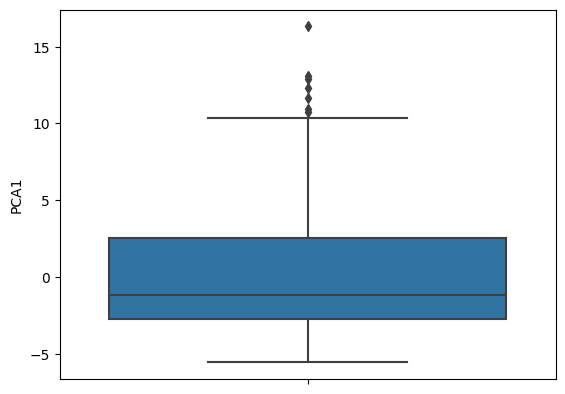

In [28]:
import seaborn as sns
sns.boxplot(y='PCA1',data=X)

In [32]:
indices=X.loc[X.PCA1>10].index

In [33]:
cancer.loc[cancer.index.isin(indices)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
78,8610862,1,20.18,23.97,143.7,1245.0,0.1286,0.3454,0.3754,0.1604,...,31.72,170.3,1623.0,0.1639,0.6164,0.7681,0.2508,0.5440,0.09964,NaN
82,8611555,1,25.22,24.91,171.5,1878.0,0.1063,0.2665,0.3339,0.1845,...,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510,NaN
108,86355,1,22.27,19.67,152.8,1509.0,0.1326,0.2768,0.4264,0.1823,...,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789,NaN
122,865423,1,24.25,20.20,166.2,1761.0,0.1447,0.2867,0.4268,0.2012,...,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009,NaN
212,8810703,1,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,...,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525,NaN
352,899987,1,25.73,17.46,174.2,2010.0,0.1149,0.2363,0.3368,0.1913,...,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815,NaN
461,911296202,1,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,...,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427,NaN
567,927241,1,20.60,29.33,140.1,1265.0,0.1178,0.2770,0.3514,0.1520,...,39.42,184.6,1821.0,0.1650,0.8681,0.9387,0.2650,0.4087,0.12400,NaN


<Axes: xlabel='PCA1', ylabel='PCA2'>

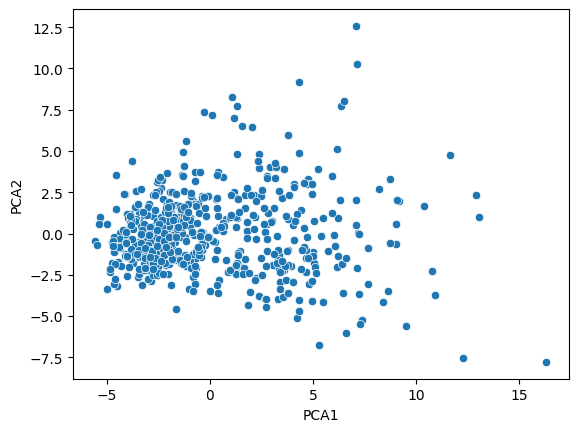

In [34]:
sns.scatterplot(data=X,x='PCA1',y='PCA2')